     Average Conc.  Temperature            Time
0         0.023590          373        1.000000
1         0.023629          373        1.778279
2         0.023700          373        3.162278
3         0.023825          373        5.623413
4         0.024046          373       10.000000
..             ...          ...             ...
120       0.680346          423   100000.000000
121       0.825430          423   177827.941004
122       0.939797          423   316227.766017
123       0.990925          423   562341.325190
124       0.999686          423  1000000.000000

[125 rows x 3 columns]


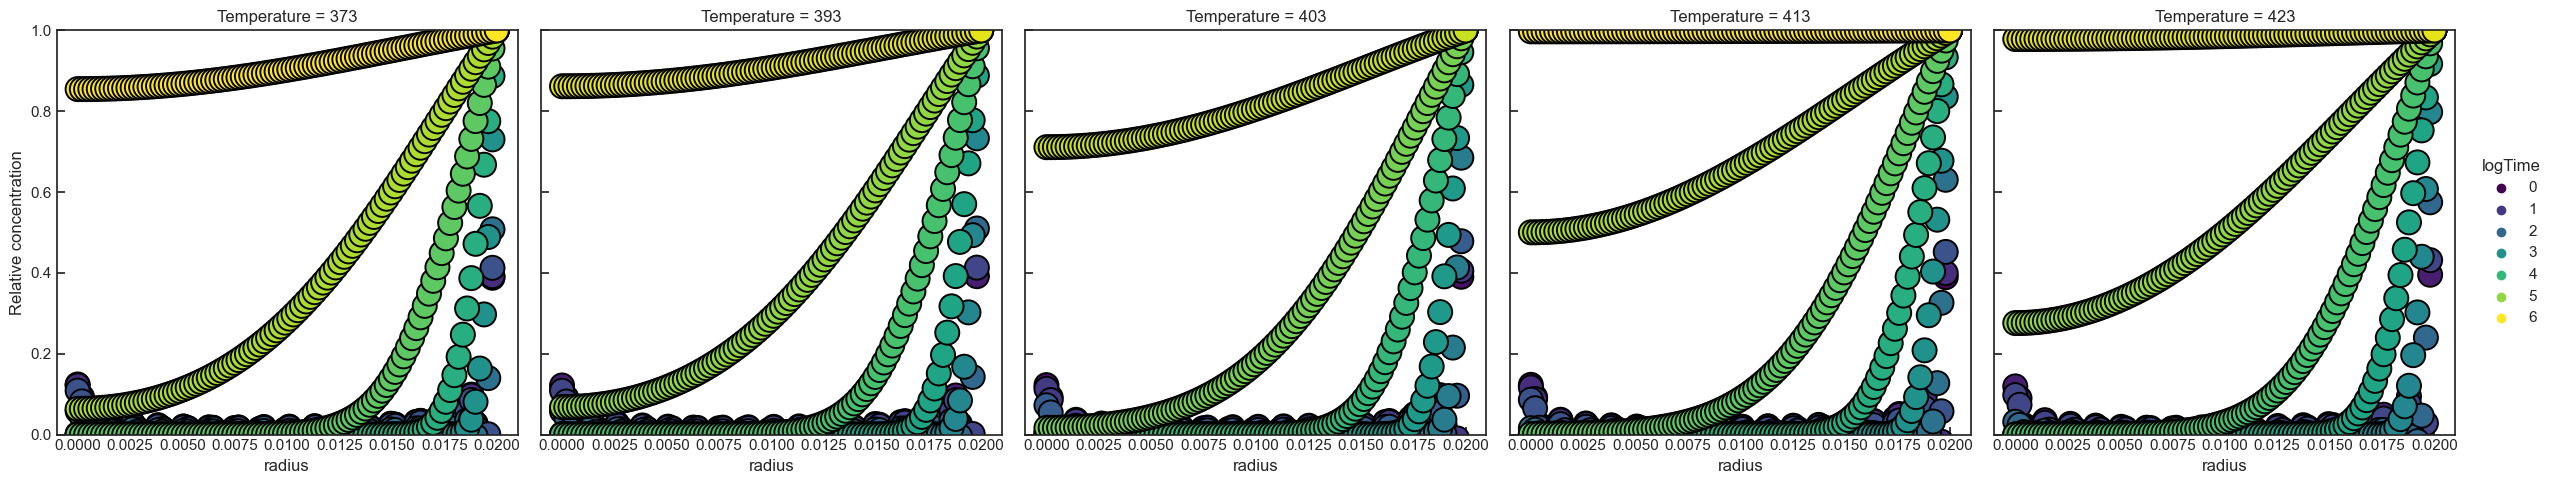

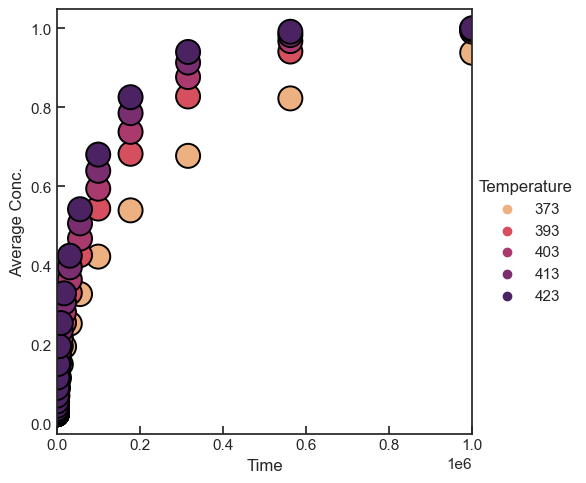

In [91]:
#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import savgol_filter
from scipy import special as spe
import seaborn as sns
import math
# Apply the default theme

#########################################################################################  #########################################################################################    
#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})


#########################################################################################  #########################################################################################


#Variables
R = 20e-3#mm
RadialResolution = 100
r = np.linspace(0,R,100)
RadialSpace = R/RadialResolution
#print(r)
Temperatures = [100,120,130,140,150]
#D is dependent on temperature, below is a placeholder
#D = 1.1e-5
Co = 1
Times = np.logspace(0,6,25)

#[0.01,10,100,1000,10000,100000,1000000]
numberofZeroes = 32
ZerosOfB = spe.jn_zeros(0, numberofZeroes)



avgValList = []
n = 0
dflist = []
for T in Temperatures:
    Temp1 = T+273
    Diff = (1.820*10**-14)*Temp1**2 - (7.17266*10**-12)*Temp1 + (3.09293*10**-10)
    D= Diff
    #print(D)
    for t in Times:
        Clist = []
        for r1 in r:
            Besselpart = 1-2*(spe.jv(0,ZerosOfB*r1/R)/(ZerosOfB*spe.jv(1,ZerosOfB))*np.exp(-ZerosOfB**2*D*t/R**2)).sum()
            
            Clist.append(Besselpart)
        rbessle =  np.multiply( np.asarray(Clist),np.asarray(r))*RadialSpace
        
        averageVal = 2*rbessle.sum()/R**2
        
        avgValList.append((averageVal,Temp1,t))
        
        #print([r,Clist])
        df1 = pd.DataFrame(zip(list(r),Clist), columns = ["radius", "Relative concentration"])
        df1["Time (s)"] = t
        df1["Temperature"] = Temp1
        if n%3 == 0:
            dflist.append(df1)
        n += 1
FullDF = pd.concat(dflist).reset_index()
#print(FullDF)
FullDF["logTime"] = np.log10(FullDF["Time (s)"] )

ConcDf = pd.DataFrame(avgValList, columns = ["Average Conc.","Temperature", "Time"])
print(ConcDf)

a1 = sns.relplot(
    data=FullDF, kind = "scatter", col = "Temperature" ,
    x="radius", y="Relative concentration",  hue= "logTime",  palette = "viridis",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
a1.set(ylim=(0.0,1))     
plt.show()


a2 = sns.relplot(
    data=ConcDf, kind = "scatter", hue = "Temperature" ,
    x="Time", y="Average Conc.",    palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
a2.set(xlim=(0.0,1000000)) 
#a2.set(xscale="log")   